

<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Họ tên sinh viên: Nguyễn thành Long
* Mã sinh viên: 1821050129
* Lớp/Nhóm môn học:DCCTKH63A/ 01
* Email:longtc9c2000@gmail.com


## Thay đổi tham số của mô hình:
---
**Học Viên Thay đổi các tham số của model KNN-->Xác định bộ tham số có độ chính xác trên tập train - test cao nhất (ưu tiên tập Test)?**


In [122]:
import pandas as pd
df_titanic = pd.read_csv('data/Data_Titanic_ok.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [127]:
#Tách biến độc lập - biến phụ thuộc
#1.Tách biến độc lập X_titanic
X_titanic = df_titanic.iloc[:,1:].values
X_titanic

array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [128]:
#2.Tách biến độ lập y_titanic
y_titanic = df_titanic.iloc[:,0].values
y_titanic


array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [131]:
#Thay đổi các tham số của model: đánh giá độ chính xác

#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic,
                                                                                   y_titanic,
                                                                                   test_size=0.3,
                                                                                   random_state=42)

#print("1. Kích thước tập Training: %d" %len(y_titanic_train))
#print("2. Kích thước tập Test    : %d" %len(y_titanic_test))
#Tách thành tập Train-Test theo tỷ lệ 75-25:                                                                     random_state=42)

print("1. Kích thước tập Training: ", X_titanic_train.shape)
print("2. Kích thước tập Test    : ",X_titanic_test.shape)


1. Kích thước tập Training:  (916, 6)
2. Kích thước tập Test    :  (393, 6)


In [132]:
from sklearn.neighbors import KNeighborsClassifier


#Khai báo model với các tham số mặc định:
KNN_titanic = KNeighborsClassifier(n_neighbors=7, 
                                 weights='uniform')

#Huấn luyện model với tập Train:
KNN_titanic.fit(X_titanic_train, y_titanic_train)
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_titanic.score(X_titanic_train, y_titanic_train)
print("Độ chính xác của Model trên tập train: ", round(acc_train*100,2),"(%)")

Độ chính xác của Model trên tập train:  86.9 (%)


In [133]:
y_titanic_pred = KNN_titanic.predict(X_titanic_test)
print("Mô hình dự đoán: ",y_titanic_pred[50:100])
print("giá trị thật   : ",y_titanic_test[50:100])

Mô hình dự đoán:  [1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 1]
giá trị thật   :  [1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1]


In [134]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_titanic_test, y_titanic_pred)
print("Độ chính xác trên tập test: ", round(acc_test*100,2),"(%)")

Độ chính xác trên tập test:  87.02 (%)


In [135]:
#Đếm số mẫu dự đoán đúng
acc_test1 = accuracy_score(y_titanic_test, y_titanic_pred, normalize = False)
print("số mẫu dự đoán đúng trên tập test: ", acc_test1, "/", len(y_titanic_test))

số mẫu dự đoán đúng trên tập test:  342 / 393


trong các trường hợp thì em thấy K=7 và weight ="uniform" có độ chính xác trên tập test là tốt nhất chiếm tỉ lệ 87,02%

# THỰC HÀNH 6: 
---
Sử dụng thuật toán KNN phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn (đã làm trong chương 2)
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán KNN để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
    - Sử dụng thuật toán KNN với các trường hợp: K= 5, 7, 11, 13 cho biết độ chính xác ứng với từng K đó trên tập Test.
    - Áp dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận. Cho biết độ chính xác của thuật toán trên tập Test và Ma trận confusion tương ứng.

In [5]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY!}
#đọc tập dữ liệu wine Dataset
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data = load_wine()
df_wine = pd.DataFrame(data['data'], columns= data['feature_names'])
df_wine['label'] = data['target']
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [6]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df_wine.iloc[70:79:]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.360,3.16,410.0,1
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472.0,1
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.310,3.50,985.0,1
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.990,3.13,886.0,1
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.230,2.14,428.0,1
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.190,2.48,392.0,1
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.960,2.52,500.0,1
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.060,2.31,750.0,1


In [8]:
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [9]:
#quan sát dắc trưng thống kê của tập dữ liệu
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


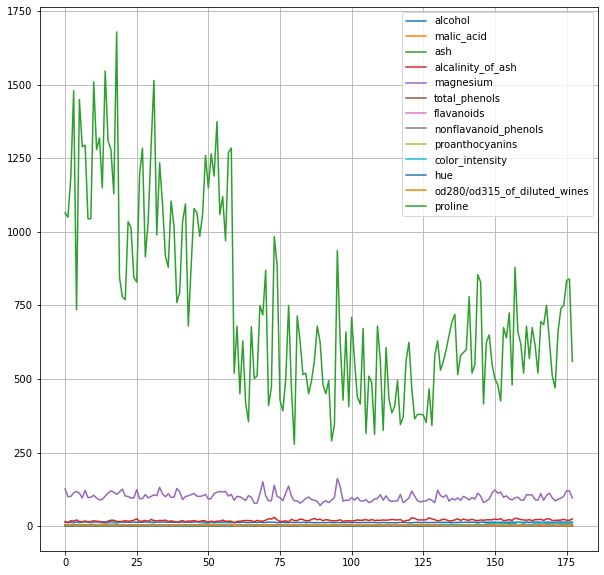

In [10]:
#xem dữ liệu các thuộc tính độc lập
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(df_wine.iloc[:,:13])
plt.legend(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'])
plt.grid(True)
plt.show()

In [11]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

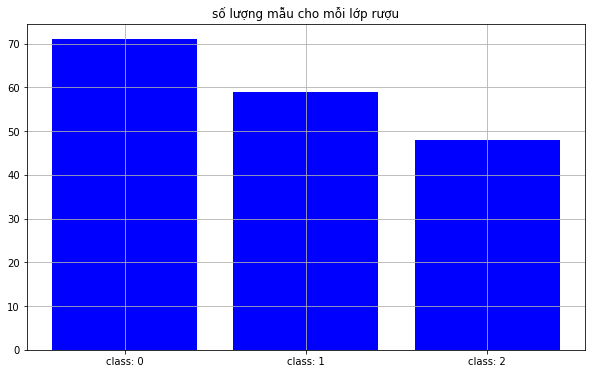

In [12]:
#kiểm tra cân bằng dữ liệu
x= df_wine['label'].value_counts()

label = ['class: 0','class: 1','class: 2']

fig = plt.figure(figsize = (10,6))
plt.title('số lượng mẫu cho mỗi lớp rượu')
plt.bar(label,x, color = 'blue')
plt.grid(True)
plt.show()

loại 0 chiếm nhiều nhất rồi đến 1,2. loại 2 ít nhất. 

In [13]:
#2. ĐỌC DỮ LIỆU MẪU VÀO BIẾN ARRAY X, y
#Đọc tập dữ liệu Wine Dataset
X_wine = df_wine.iloc[:,:-1].values
y_wine = df_wine.loc[:,'label'].values

print(type(X_wine))
print('Kích thước biến độc lập X(features):', X_wine.shape)
print('Kích thước biến phụ thuộc y(label)   :', y_wine.shape)

<class 'numpy.ndarray'>
Kích thước biến độc lập X(features): (178, 13)
Kích thước biến phụ thuộc y(label)   : (178,)


In [14]:
#Biến độc lập
X_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
#Hiển thị dữ liệu 1 vài mẫu
print('Bộ dữ liệu 1)  ', X_wine[1,:], '--',y_wine[1])
print('Bộ dữ liệu 75) ', X_wine[75,:], '--',y_wine[75])
print('Bộ dữ liệu 150)', X_wine[150,:], '--',y_wine[150])

Bộ dữ liệu 1)   [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] -- 0
Bộ dữ liệu 75)  [1.166e+01 1.880e+00 1.920e+00 1.600e+01 9.700e+01 1.610e+00 1.570e+00
 3.400e-01 1.150e+00 3.800e+00 1.230e+00 2.140e+00 4.280e+02] -- 1
Bộ dữ liệu 150) [1.35e+01 3.12e+00 2.62e+00 2.40e+01 1.23e+02 1.40e+00 1.57e+00 2.20e-01
 1.25e+00 8.60e+00 5.90e-01 1.30e+00 5.00e+02] -- 2


### 2. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (75%)
* Test: dùng để kiểm thử mô hình (25%)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, 
                                                    y_wine,
                                                    test_size=0.25,
                                                    random_state=42)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 133
2. Kích thước tập Test    : 45


In [18]:
X_test

array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
        1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
        1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
        8.450000e+02],
       [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
        1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
        1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
        1.080000e+03],
       [1.293000e+01, 2.810000e+00, 2.700000e+00, 2.100000e+01,
        9.600000e+01, 1.540000e+00, 5.000000e-01, 5.300000e-01,
        7.500000e-01, 4.600000e+00, 7.700000e-01, 2.310000e+00,
        6.000000e+02],
       [1.373000e+01, 1.500000e+00, 2.700000e+00, 2.250000e+01,
        1.010000e+02, 3.000000e+00, 3.250000e+00, 2.900000e-01,
        2.380000e+00, 5.700000e+00, 1.190000e+00, 2.710000e+00,
        1.285000e+03],
       [1.237000e+01, 1.170000e+00, 1.920000e+00, 1.960000e+01,
        7.800000e+01, 2.110000e+00, 2.000000e+00, 2.700000e-01,
        1.04

In [19]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

Sử dụng mô hình KNN cho bài toán phân lớp
---

In [58]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN sử dụng các tham số k=5
KNN_wine = KNeighborsClassifier(n_neighbors=5)

In [59]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
#Độ chính xác của Model trên tập Huấn luyện
ac_train = KNN_wine.score(X_train, y_train)
print("Độ chính xác của Model trên tập train: ", round(ac_train*100,2),"(%)")

Độ chính xác của Model trên tập train:  76.69 (%)


In [60]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 2 2 1 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 1]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [61]:
#Đánh giá độ chính xác k=5:
from sklearn.metrics import accuracy_score

ac_test = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập test: ", round(ac_test*100,2),"(%)")

Độ chính xác trên tập test:  71.11 (%)


với k=5 thì độ chính xác trên tập test không được tốt lắm chỉ đúng được 71,11%.

In [65]:
#Khai báo model với các tham số k=7:
KNN_wine1 = KNeighborsClassifier(n_neighbors=7)

#Huấn luyện model với tập Train:
KNN_wine1.fit(X_train, y_train)
#Độ chính xác của Model trên tập Huấn luyện
ac_train1 = KNN_wine1.score(X_train, y_train)
print("Độ chính xác của Model trên tập train: ", round(ac_train1*100,2),"(%)")

Độ chính xác của Model trên tập train:  78.95 (%)


In [66]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred1 = KNN_wine1.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred1)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [0 0 2 0 1 0 1 2 2 0 2 2 0 1 0 1 1 2 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [76]:
#Đánh giá độ chính xác k=7:
ac_test1 = accuracy_score(y_test, y_pred1)
print("Độ chính xác trên tập test: ", round(ac_test1*100,2),"(%)")

Độ chính xác trên tập test:  73.33 (%)


với k=7 thì độ chính xác trên tập test không được tốt lắm chỉ đúng được 72,33%.

In [109]:
#Khai báo model với các tham số k=11:
KNN_wine2 = KNeighborsClassifier(n_neighbors=11)

#Huấn luyện model với tập Train:
KNN_wine2.fit(X_train, y_train)
#Độ chính xác của Model trên tập Huấn luyện
ac_train2 = KNN_wine2.score(X_train, y_train)
print("Độ chính xác của Model trên tập train: ", round(ac_train2*100,2),"(%)")

Độ chính xác của Model trên tập train:  74.44 (%)


In [110]:
y_pred2 = KNN_wine2.predict(X_test)
print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred2)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 2 0 2 0 0 2 0 1 0 1 1 2 0 1 0 1 2 2 1 2 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [111]:
#Đánh giá độ chính xác k=11:
ac_test2 = accuracy_score(y_test, y_pred2)
print("Độ chính xác trên tập test: ", round(ac_test2*100,2),"(%)")

Độ chính xác trên tập test:  71.11 (%)


với k=11 thì độ chính xác trên tập test không được tốt lắm chỉ đúng được 71,11%.

In [99]:
#Khai báo model với các tham số k=13:
KNN_wine3 = KNeighborsClassifier(n_neighbors=13)

#Huấn luyện model với tập Train:
KNN_wine3.fit(X_train, y_train)
#Độ chính xác của Model trên tập Huấn luyện
ac_train3 = KNN_wine3.score(X_train, y_train)
print("Độ chính xác của Model trên tập train: ", round(ac_train3*100,2),"(%)")

Độ chính xác của Model trên tập train:  73.68 (%)


In [100]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred3 = KNN_wine3.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred3)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 2 0 2 0 0 2 0 1 0 1 1 2 0 1 0 1 2 2 1 2 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [101]:
#Đánh giá độ chính xác k=13:
ac_test3 = accuracy_score(y_test, y_pred3)
print("Độ chính xác trên tập test: ", round(ac_test3*100,2),"(%)")

Độ chính xác trên tập test:  71.11 (%)


với k=13 thì độ chính xác trên tập test không được tốt lắm chỉ đúng được 71,11%.

# thay đổi tham số với k= 9 và có đánh trọng số lân cân.


In [102]:
#Khai báo model với các tham số k=9 và waights = distance:
KNN_wine4 = KNeighborsClassifier(n_neighbors=9,
                                weights = 'distance')

#Huấn luyện model với tập Train:
KNN_wine4.fit(X_train, y_train)
#Độ chính xác của Model trên tập Huấn luyện
ac_train4 = KNN_wine4.score(X_train, y_train)
print("Độ chính xác của Model trên tập train: ", round(ac_train4*100,2),"(%)")

Độ chính xác của Model trên tập train:  100.0 (%)


In [103]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred4 = KNN_wine4.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred4)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 1 2 2 0 2 1 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0 2
 2 2 2 0 1 1 2 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [105]:
#Đánh giá độ chính xác k=9 và waights = distance:
ac_test4 = accuracy_score(y_test, y_pred4)
print("Độ chính xác trên tập test: ", round(ac_test4*100,2),"(%)")

Độ chính xác trên tập test:  77.78 (%)


với k=9 và weights = distance thì độ chính xác trên tập test tốt hơn các tham số trước và đạt độ chính xác là 77,78%.

# Ma trận confusion tương ứng

In [106]:
#Đếm số lượng theo từng lớp trong tập Test
from collections import Counter

print('Tổng số mẫu tập Test:', len(y_test))
print(Counter(y_test))

Tổng số mẫu tập Test: 45
Counter({1: 18, 0: 15, 2: 12})


In [107]:
#Đếm số mẫu dự đoán đúng
ac_test4 = accuracy_score(y_test, y_pred4,normalize=False)
print('Tổng số mẫu dự đoán đúng trên tập Test:', ac_test4, ' /', len(y_test))

Tổng số mẫu dự đoán đúng trên tập Test: 35  / 45


In [114]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix
cnf_matrix_wine = confusion_matrix(y_test,y_pred4)
print('Confusion matrix - wine:')
print(cnf_matrix_wine)

Confusion matrix - wine:
[[13  0  2]
 [ 0 13  5]
 [ 1  2  9]]


In [115]:
#Trực quan hóa ma trận Confusion matrix:

import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Ground Truth label')
    plt.xlabel('Predicted label')

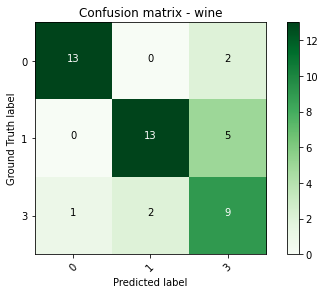

In [116]:
class_names = [0,1,3]
plot_confusion_matrix(cnf_matrix_wine,
                      classes=class_names,
                      title='Confusion matrix - wine')

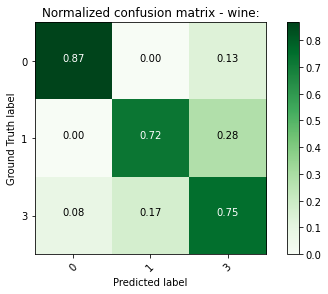

In [117]:
plot_confusion_matrix(cnf_matrix_wine, 
                      classes=class_names, 
                      normalize=True,
                      title='Normalized confusion matrix - wine:')
plt.show()